**IMPORT REQUIRED PACKAGES**

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, Activation, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import random
import shutil
from shutil import copy
%matplotlib inline
print(tf.__version__)


2.15.0


**IMPORT DATASET**

In [3]:
!git clone https://github.com/Icyfire18/Face_Counting.git

Cloning into 'Face_Counting'...
Updating files:   9% (768/8205)
Updating files:  10% (821/8205)
Updating files:  11% (903/8205)
Updating files:  12% (985/8205)
Updating files:  13% (1067/8205)
Updating files:  14% (1149/8205)
Updating files:  15% (1231/8205)
Updating files:  16% (1313/8205)
Updating files:  17% (1395/8205)
Updating files:  17% (1457/8205)
Updating files:  18% (1477/8205)
Updating files:  19% (1559/8205)
Updating files:  20% (1641/8205)
Updating files:  21% (1724/8205)
Updating files:  22% (1806/8205)
Updating files:  23% (1888/8205)
Updating files:  24% (1970/8205)
Updating files:  25% (2052/8205)
Updating files:  26% (2134/8205)
Updating files:  27% (2216/8205)
Updating files:  27% (2243/8205)
Updating files:  28% (2298/8205)
Updating files:  29% (2380/8205)
Updating files:  30% (2462/8205)
Updating files:  31% (2544/8205)
Updating files:  32% (2626/8205)
Updating files:  33% (2708/8205)
Updating files:  34% (2790/8205)
Updating files:  35% (2872/8205)
Updating files:

In [5]:
!dir

 Volume in drive C is OS
 Volume Serial Number is 283F-EEBA

 Directory of c:\Users\S Karun Vikhash\Desktop\test\Ai lab\Face_Counting

06-04-2024  12:27    <DIR>          .
06-04-2024  12:21    <DIR>          ..
06-04-2024  12:21           845,960 bbox_train.csv
06-04-2024  12:21    <DIR>          dataset
06-04-2024  12:27    <DIR>          Face_Counting
06-04-2024  12:21               905 haarcascade_facecount.py
06-04-2024  12:21         1,290,445 haarcascade_frontalface_default.xml
06-04-2024  12:27         2,817,730 model.ipynb
06-04-2024  12:21               917 README.md
06-04-2024  12:21            74,835 SampleCalculations.jpg
06-04-2024  12:21            27,099 test_Rj9YEaI.csv
06-04-2024  12:21            74,730 train.csv
               8 File(s)      5,132,621 bytes
               4 Dir(s)  317,183,283,200 bytes free


In [6]:
bbox_train = pd.read_csv("Face_Counting/bbox_train.csv")
bbox_train.head()

Name  width  height  xmin  ymin  xmax  ymax
0  10001.jpg    612     408   192   199   230   235
1  10001.jpg    612     408   247   168   291   211
2  10001.jpg    612     408   321   176   366   222
3  10001.jpg    612     408   355   183   387   214
4  10002.jpg    612     408   339   165   378   202

In [7]:
train = pd.read_csv("Face_Counting/train.csv")
train.head()

Name  HeadCount
0  10001.jpg          4
1  10002.jpg          4
2  10003.jpg          2
3  10004.jpg          3
4  10006.jpg          4

In [7]:
df1 = pd.DataFrame(train)
df1.groupby('HeadCount').size()

HeadCount
1       52
2     1069
3     1424
4     1238
5      810
6      472
7      254
8      136
9       93
10      47
11      37
12      23
13      20
14      15
15       7
16       5
17       4
18       6
19       2
20       4
21       1
22       2
23       2
24       3
25       1
28       2
29       1
31       2
77       1
dtype: int64

In [9]:
img_dir="./Face_Counting/dataset/"
len(os.listdir(img_dir))

8197

In [10]:
test=pd.read_csv('Face_Counting/test_Rj9YEaI.csv')
test.head()

Name
0  10005.jpg
1  10009.jpg
2  10015.jpg
3  10022.jpg
4  10023.jpg

In [24]:
def show_images(images, cols = 1, titles = None):
    assert((titles is None)or (len(images) == len(titles)))
    n_images = len(images)
    if titles is None: titles = ['Image (%d)' % i for i in range(1,n_images + 1)]
    fig = plt.figure()
    for n, (image, title) in enumerate(zip(images, titles)):
        a = fig.add_subplot(cols, int(np.ceil(n_images/float(cols))), n + 1)
        if plt.imread(image).ndim == 3:
            plt.gray()
        plt.imshow(plt.imread(image))
        a.set_title(title)
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
    fig.tight_layout()
    plt.show()

In [18]:
img_dir

'./Face_Counting/dataset/'

In [19]:
images = []
for i in range(len(train)):
  images.append(img_dir+train['Name'][i])

In [21]:
images

['./Face_Counting/dataset/10001.jpg',
 './Face_Counting/dataset/10002.jpg',
 './Face_Counting/dataset/10003.jpg',
 './Face_Counting/dataset/10004.jpg',
 './Face_Counting/dataset/10006.jpg',
 './Face_Counting/dataset/10007.jpg',
 './Face_Counting/dataset/10008.jpg',
 './Face_Counting/dataset/10010.jpg',
 './Face_Counting/dataset/10011.jpg',
 './Face_Counting/dataset/10012.jpg',
 './Face_Counting/dataset/10013.jpg',
 './Face_Counting/dataset/10014.jpg',
 './Face_Counting/dataset/10016.jpg',
 './Face_Counting/dataset/10017.jpg',
 './Face_Counting/dataset/10018.jpg',
 './Face_Counting/dataset/10019.jpg',
 './Face_Counting/dataset/10020.jpg',
 './Face_Counting/dataset/10021.jpg',
 './Face_Counting/dataset/10026.jpg',
 './Face_Counting/dataset/10027.jpg',
 './Face_Counting/dataset/10028.jpg',
 './Face_Counting/dataset/10031.jpg',
 './Face_Counting/dataset/10032.jpg',
 './Face_Counting/dataset/10034.jpg',
 './Face_Counting/dataset/10035.jpg',
 './Face_Counting/dataset/10038.jpg',
 './Face_Cou

In [20]:
titles =[]
for i in range(len(train)):
  titles.append("Num Of Head Count:"+str(train['HeadCount'][i]))

In [22]:
titles

['Num Of Head Count:4',
 'Num Of Head Count:4',
 'Num Of Head Count:2',
 'Num Of Head Count:3',
 'Num Of Head Count:4',
 'Num Of Head Count:4',
 'Num Of Head Count:6',
 'Num Of Head Count:7',
 'Num Of Head Count:6',
 'Num Of Head Count:8',
 'Num Of Head Count:4',
 'Num Of Head Count:7',
 'Num Of Head Count:2',
 'Num Of Head Count:3',
 'Num Of Head Count:4',
 'Num Of Head Count:2',
 'Num Of Head Count:4',
 'Num Of Head Count:3',
 'Num Of Head Count:2',
 'Num Of Head Count:6',
 'Num Of Head Count:3',
 'Num Of Head Count:4',
 'Num Of Head Count:4',
 'Num Of Head Count:4',
 'Num Of Head Count:4',
 'Num Of Head Count:7',
 'Num Of Head Count:5',
 'Num Of Head Count:4',
 'Num Of Head Count:4',
 'Num Of Head Count:4',
 'Num Of Head Count:2',
 'Num Of Head Count:8',
 'Num Of Head Count:3',
 'Num Of Head Count:4',
 'Num Of Head Count:4',
 'Num Of Head Count:11',
 'Num Of Head Count:3',
 'Num Of Head Count:2',
 'Num Of Head Count:2',
 'Num Of Head Count:2',
 'Num Of Head Count:2',
 'Num Of Head C

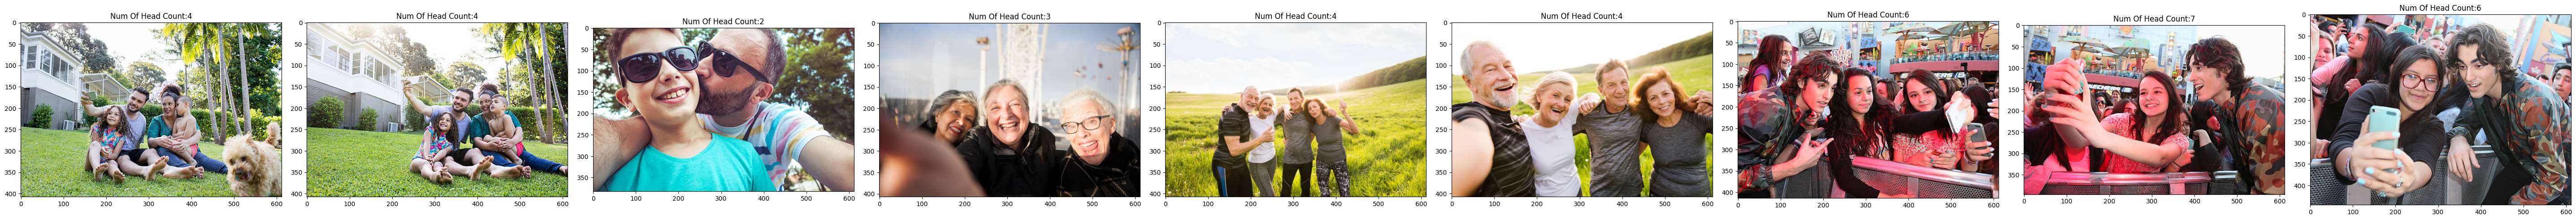

In [25]:
show_images(images[:9],titles=titles[:9])

In [33]:
os.mkdir('./content/Face_Counting/')
os.mkdir('./content/Face_Counting/train/')
os.mkdir('./content/Face_Counting/valid/')   
os.mkdir('./content/Face_Counting/model/')

In [34]:
train.shape[0]*.10

573.3000000000001

In [35]:
valid_imgs = random.sample(train['Name'].tolist(),574)
train_imgs = list(set(train['Name'].tolist()) - set(valid_imgs))

In [38]:
for i in range(len(train_imgs)):
    shutil.copy(img_dir+train_imgs[i],'./content/Face_Counting/train/')
    
for j in range(len(valid_imgs)):
    shutil.copy(img_dir+valid_imgs[j],'./content/Face_Counting/valid/')
print (len(os.listdir('./content/Face_Counting/train/')))
print (len(os.listdir('./content/Face_Counting/valid/')))

5159
574


In [ ]:
# LINUX COMMAND
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /content/Face_Counting/model/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

Create an instance of the inception model from the local pre-trained weights

In [44]:
local_weights_file = './content/Face_Counting/model/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pre_trained_model = InceptionV3(input_shape = (150, 150, 3), 
                                include_top = False, 
                                weights = None)

pre_trained_model.load_weights(local_weights_file)

# Make all the layers in the pre-trained model non-trainable
for layer in pre_trained_model.layers:
  layer.trainable = False
  
# Print the model summary
pre_trained_model.summary()


Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 conv2d_94 (Conv2D)          (None, 74, 74, 32)           864       ['input_2[0][0]']             
                                                                                                  
 batch_normalization_94 (Ba  (None, 74, 74, 32)           96        ['conv2d_94[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_94 (Activation)  (None, 74, 74, 32)           0         ['batch_normalizati

In [45]:
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 7, 7, 768)


In [46]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_loss')<0.1):
      print("\nReached 0.50 loss so cancelling training!")
      self.model.stop_training = True
        
callbacks = myCallback()

In [48]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adadelta
from tensorflow.keras import layers
# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(256, activation='relu')(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.40
x = layers.Dropout(0.40)(x)                  
# Add a final sigmoid layer for classification
x = layers.Dense(1, activation='linear')(x)           

model = Model( pre_trained_model.input, x) 

model.compile(optimizer = Adadelta(lr=0.001), 
              loss = 'mean_squared_error')

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 conv2d_94 (Conv2D)          (None, 74, 74, 32)           864       ['input_2[0][0]']             
                                                                                                  
 batch_normalization_94 (Ba  (None, 74, 74, 32)           96        ['conv2d_94[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_94 (Activation)  (None, 74, 74, 32)           0         ['batch_normalization_94[0

In [50]:
train_df = pd.DataFrame(columns=['Name'])
train_imgs = os.listdir('./content/Face_Counting/train/')
train_df['Name'] = train_imgs
train_df = pd.merge(train_df,train)
print (train_df.shape)
train_df.head()

(5159, 2)


Name  HeadCount
0  10001.jpg          4
1  10002.jpg          4
2  10004.jpg          3
3  10006.jpg          4
4  10007.jpg          4

In [51]:
valid_df = pd.DataFrame(columns=['Name'])
valid_imgs = os.listdir('./content/Face_Counting/valid/')
valid_df['Name'] = valid_imgs
valid_df = pd.merge(valid_df,train)
print (valid_df.shape)
valid_df.head()

(574, 2)


Name  HeadCount
0  10003.jpg          2
1  10011.jpg          6
2  10026.jpg          2
3  10051.jpg          4
4  10060.jpg          2

In [52]:
# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                  fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator( rescale = 1.0/255. )

# Flow training images in batches of 20 using train_datagen generator
train_generator_df = train_datagen.flow_from_dataframe(dataframe=train_df, 
                                                       directory='./content/Face_Counting/train/', 
                                                       x_col="Name", y_col="HeadCount", class_mode="other", target_size=(150,150), batch_size=20)  

# Flow validation images in batches of 20 using test_datagen generator
validation_generator_df =  test_datagen.flow_from_dataframe( dataframe=valid_df, 
                                                            directory='./content/Face_Counting/valid/', 
                                                            x_col="Name", y_col="HeadCount", 
                                                            class_mode="other", target_size=(150,150), batch_size=20)

Found 5159 validated image filenames.
Found 574 validated image filenames.


In [53]:
history = model.fit_generator(
            train_generator_df,
            validation_data = validation_generator_df,
#             steps_per_epoch = 100,
            epochs = 10,
#             validation_steps = 50,
            verbose = 2,
            callbacks=[callbacks])

Epoch 1/10


C:\Users\S Karun Vikhash\AppData\Local\Temp\ipykernel_67920\3122883590.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


258/258 - 47s - loss: 18.0826 - val_loss: 11.2727 - 47s/epoch - 181ms/step
Epoch 2/10
258/258 - 44s - loss: 7.8465 - val_loss: 8.2088 - 44s/epoch - 170ms/step
Epoch 3/10
258/258 - 43s - loss: 7.2558 - val_loss: 7.9587 - 43s/epoch - 167ms/step
Epoch 4/10
258/258 - 43s - loss: 7.1248 - val_loss: 7.7729 - 43s/epoch - 166ms/step
Epoch 5/10
258/258 - 43s - loss: 6.9064 - val_loss: 7.5456 - 43s/epoch - 166ms/step
Epoch 6/10
258/258 - 43s - loss: 6.8111 - val_loss: 7.3549 - 43s/epoch - 167ms/step
Epoch 7/10
258/258 - 43s - loss: 6.6573 - val_loss: 7.1443 - 43s/epoch - 167ms/step
Epoch 8/10
258/258 - 43s - loss: 6.5638 - val_loss: 6.9422 - 43s/epoch - 168ms/step
Epoch 9/10
258/258 - 117s - loss: 6.3861 - val_loss: 6.8060 - 117s/epoch - 452ms/step
Epoch 10/10
258/258 - 46s - loss: 6.3289 - val_loss: 6.6511 - 46s/epoch - 177ms/step


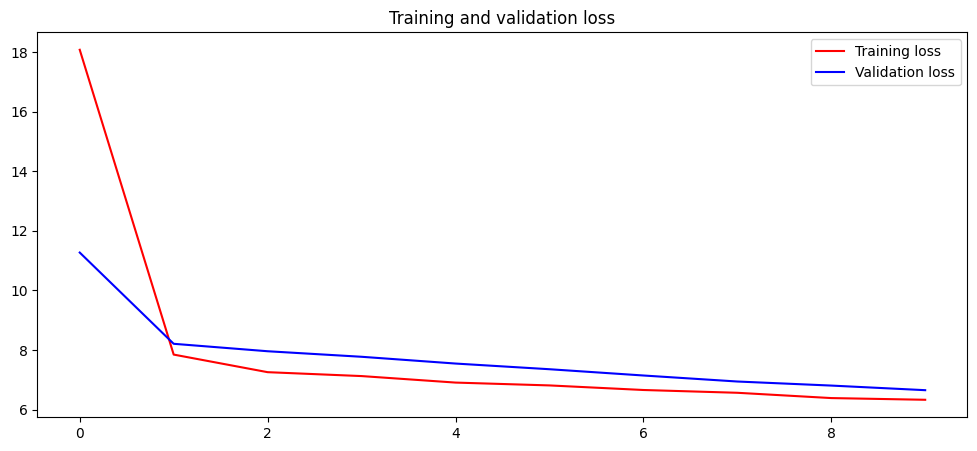

<Figure size 640x480 with 0 Axes>

In [54]:
plt.figure(figsize=(12,5))
val_loss = history.history['val_loss']
loss = history.history['loss']


epochs = range(len(val_loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()